<a href="https://colab.research.google.com/github/luismiguelcasadodiaz/IBM_SkillsBuild_IA_325/blob/main/IA_325_py_ex_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 1 de Regresión logística, 11 del curso

[Origen de los datos Titanic](https://www.kaggle.com/c/titanic/data)

In [390]:
!pip uninstall numpy -y
!pip install numpy==1.24.4 # Or a similar older version

Found existing installation: numpy 1.24.4
Uninstalling numpy-1.24.4:
  Successfully uninstalled numpy-1.24.4
  Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.4 which is incompatible.
blosc2 3.3.2 requires numpy>=1.26, but you have numpy 1.24.4 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.4 which is incompatible.
pymc 5.22.0 requires numpy>=1.25.0, but you have numpy 1.24.4 which is incompati

In [391]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [392]:
%ls

sample_data/  test.csv  train.csv


In [393]:
entrenamiento = pd.read_csv('train.csv')

In [394]:
entrenamiento.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## visualización de las columnas con datos nulos

<Axes: >

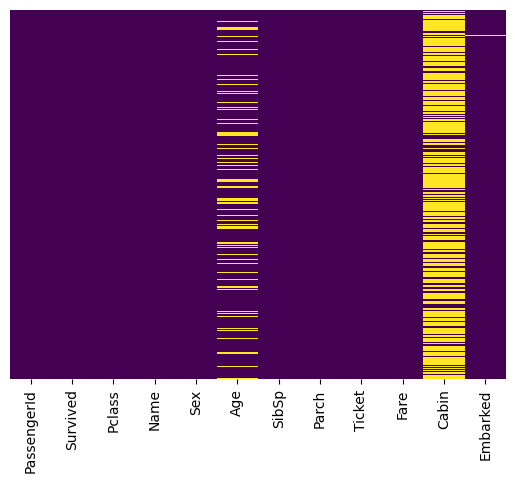

In [395]:
sns.heatmap(entrenamiento.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### las columnas a las que les faltan más datos (Age y Cabin) debería ser desconsideradas del estudio

## contando los sobrevivientes (Survived=1)

<Axes: xlabel='Survived', ylabel='count'>

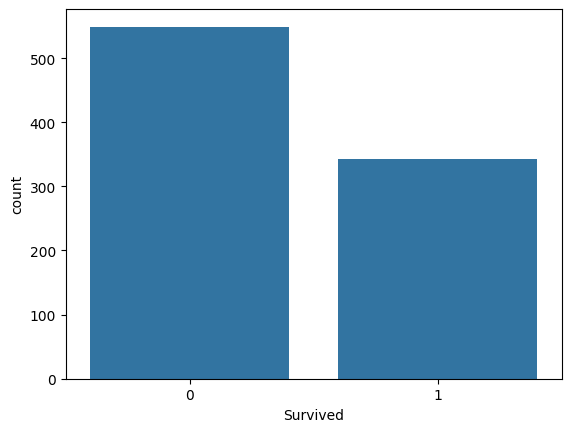

In [396]:
sns.countplot(x='Survived',data=entrenamiento)

## contando los sobrevivientes (Survived=1) por sexo

<Axes: xlabel='Survived', ylabel='count'>

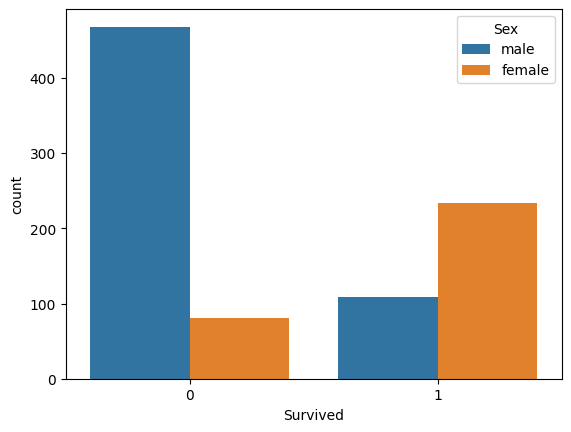

In [397]:
sns.countplot(x='Survived',data=entrenamiento, hue='Sex')

## contando los sobrevivientes (Survived=1) por clase

<Axes: xlabel='Survived', ylabel='count'>

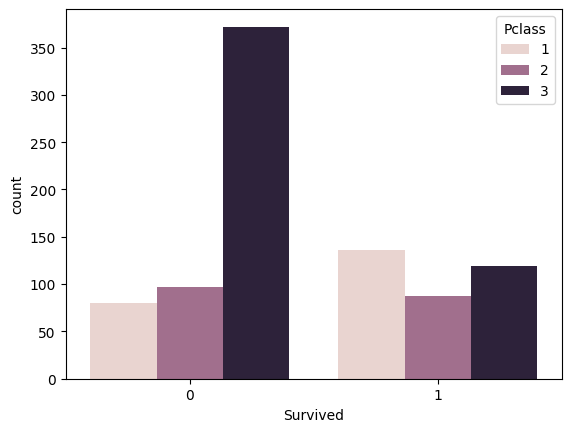

In [398]:
sns.countplot(x='Survived',data=entrenamiento, hue='Pclass')

## Distribución de las edades de los pasageros

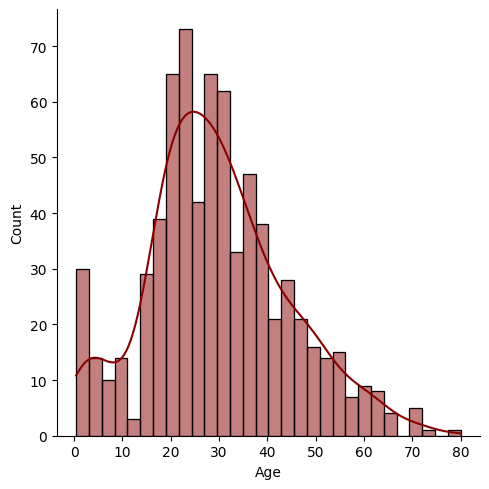

In [399]:
sns.displot(entrenamiento['Age'].dropna(),kde=True,color='darkred',bins=30)

<Axes: >

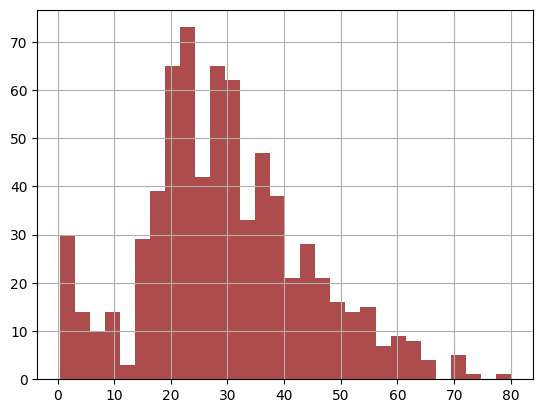

In [400]:
entrenamiento['Age'].hist(bins=30,color='darkred',alpha=0.7)

<Axes: ylabel='Frequency'>

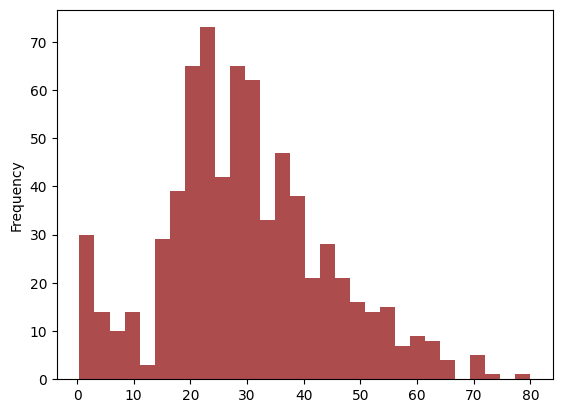

In [401]:
entrenamiento['Age'].plot.hist(bins=30,color='darkred',alpha=0.7)

## Distribución del número de familiares de los pasajeros

<Axes: ylabel='Frequency'>

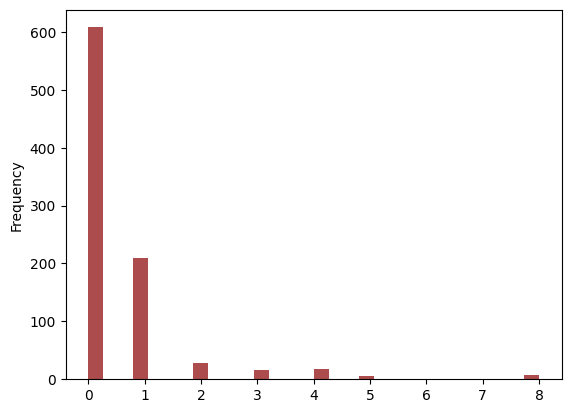

In [402]:
entrenamiento['SibSp'].plot.hist(bins=30,color='darkred',alpha=0.7)

In [403]:
import cufflinks as cf

cf.go_offline()

fig = entrenamiento['SibSp'].iplot(kind='hist', bins=30, asFigure=True)
fig.update_traces(marker_color='green')
fig.show()

In [404]:
entrenamiento['SibSp'].iplot(kind='hist',color='green')

## limpieza da columnas con muchos valores nulos

#### Reemplazamos las edades nulas por la edad media de los pasageros segun las clases del pasaje

<Axes: xlabel='Pclass', ylabel='Age'>

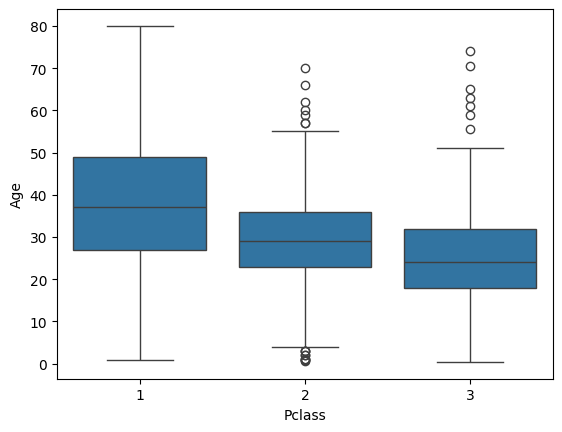

In [405]:
sns.boxplot(x='Pclass',y='Age',data=entrenamiento)

In [406]:
# Calculamos las edades medias de cada clase
entrenamiento.groupby(['Pclass'])['Age'].mean().values

array([38.23344086, 29.87763006, 25.14061972])

In [407]:
def edad_media(fila):
  edad = fila['Age']
  clase = fila['Pclass']
  if pd.isnull(edad):
    if clase == 1:
      return 38.23344086
    elif clase == 2:
      return 29.87763006
    else:
      return 25.14061972
  else:
    return edad

In [408]:
# Aplicamos la función anterior a cada combinacion de de edad y clase
entrenamiento['Age'] = entrenamiento[['Age','Pclass']].apply(edad_media,axis=1)

<Axes: >

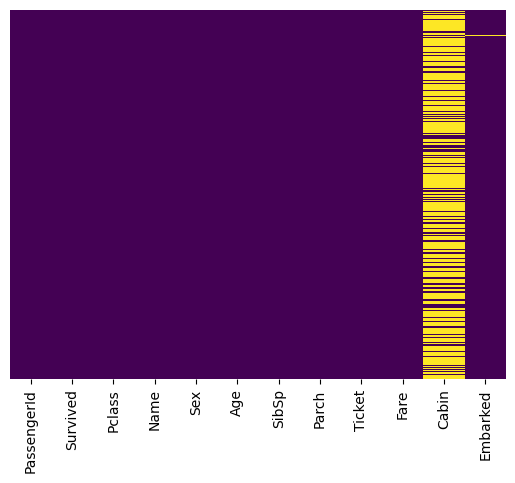

In [409]:
sns.heatmap(entrenamiento.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### muchas valores nulos en cabin, la eliminamos del datasert

In [410]:
entrenamiento.drop('Cabin',axis=1,inplace=True)

<Axes: >

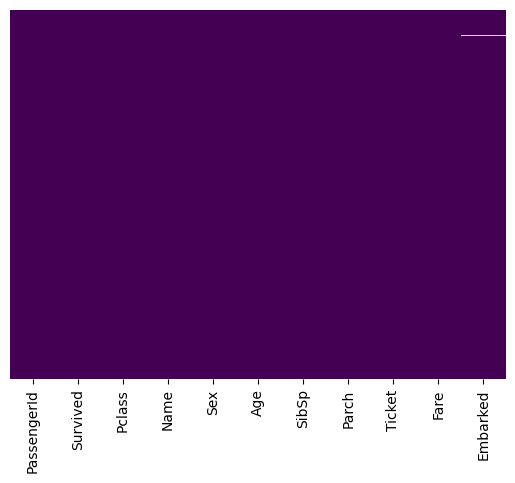

In [411]:
sns.heatmap(entrenamiento.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## estado del dataset

In [412]:
entrenamiento.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [413]:
print(entrenamiento['Embarked'].value_counts(dropna=False))

Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64


In [414]:
entrenamiento.dropna(subset=['Embarked'],inplace=True)
print(entrenamiento['Embarked'].value_counts(dropna=False))

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [415]:
entrenamiento.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [416]:
entrenamiento

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.0000,C


## Para la regresión logística nos interesan solamente las columnas cuantitativas

borraremos:
+ nombre del pasajero
+ código del ticket
+ passangerID, es un numero secuencial

In [417]:
entrenamiento.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
entrenamiento.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Transformacion de la variable categórica sex en variable numérica

usamos la técnica del las dummi variables o **one-hot encoding**

In [418]:
pd.get_dummies(entrenamiento['Sex'],)

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
886,False,True
887,True,False
888,True,False
889,False,True


### Como solo hay dos columnas y son complementarias, podemos quedarnso con solamente una column

In [419]:
sexo = pd.get_dummies(entrenamiento['Sex'], drop_first=True)

In [420]:
entrenamiento = pd.concat([entrenamiento,sexo],axis=1)
entrenamiento.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,male,22.0,1,0,7.2500,S,True
1,1,1,female,38.0,1,0,71.2833,C,False
2,1,3,female,26.0,0,0,7.9250,S,False
3,1,1,female,35.0,1,0,53.1000,S,False
4,0,3,male,35.0,0,0,8.0500,S,True


In [421]:
entrenamiento.drop('Sex',axis=1,inplace=True)
entrenamiento.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,22.0,1,0,7.2500,S,True
1,1,1,38.0,1,0,71.2833,C,False
2,1,3,26.0,0,0,7.9250,S,False
3,1,1,35.0,1,0,53.1000,S,False
4,0,3,35.0,0,0,8.0500,S,True


## repetimos el proceso para la columna "Embarked"

### En el heatmap anterior hemos visto que esta columna tiena algun nulo. Son pocos. Hay que eliminar las filas

In [422]:
puertos = pd.get_dummies(entrenamiento['Embarked'])

In [423]:
puertos.isnull().sum()

,0
C,0
Q,0
S,0


## Son complemetarias. Cuando q y s son falsas quiere decir que es C. Podemos borrar la primera columna

In [424]:
puerto_embarque = pd.get_dummies(entrenamiento['Embarked'], drop_first=True)
puerto_embarque.isnull().sum()

,0
Q,0
S,0


In [425]:
entrenamiento = pd.concat([entrenamiento,puerto_embarque],axis=1)

In [426]:
entrenamiento.isnull().sum()

,0
Survived,0
Pclass,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0
male,0
Q,0
S,0


In [427]:
entrenamiento.drop('Embarked', axis=1, inplace=True)
entrenamiento.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [428]:
entrenamiento.isnull().sum()

,0
Survived,0
Pclass,0
Age,0
SibSp,0
Parch,0
Fare,0
male,0
Q,0
S,0


In [429]:
entrenamiento.shape

(889, 9)

In [430]:
entrenamiento.isnull().sum()

,0
Survived,0
Pclass,0
Age,0
SibSp,0
Parch,0
Fare,0
male,0
Q,0
S,0


# Entrenamiento del modelo

Una vez concluida la limpieza del dataset podemos entrenar el modelo.

Queremos que el modelo prediga si el pasajero sobrevivio o no en función del resto de variables.

+ Variable dependiente : **Survived**
+ variables independientes : El resto

In [431]:
y = entrenamiento['Survived']
X = entrenamiento.drop('Survived', axis=1)
X.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,True,False,True
1,1,38.0,1,0,71.2833,False,False,False
2,3,26.0,0,0,7.9250,False,False,True
3,1,35.0,1,0,53.1000,False,False,True
4,3,35.0,0,0,8.0500,True,False,True


#### Dividimos el dataset original en dos. Uno para entrenar y otro para testar

In [432]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

##### Se puede verificar que los numeros de registro en X_train e y_train coinciden y son diferentes de los números de registros en X_test e y_text.

In [433]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

## vamos a scalar los datos a ver si eliminamos el warning anterior

In [439]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)  # Ajusta los parámetros de escala (media, desviación estándar) SOLO en X_train
X_train_scaled = scaler.transform(X_train) # Aplica la transformación a X_train
X_test_scaled = scaler.transform(X_test)  # Aplica la MISMA transformación a X_test


# El pandas DataFrames con nombres de columnas (X_test),
# ha sido convertido en un NumPy array,
# que pierde los nombres de las columnas.
# El escalamiento (StandardScaler) hace eso.
# Luego, en la predicción si usamos(predict(X_test)),
# estás pasando un DataFrame con nombres, lo que produce la advertencia.
# predict(X_test_scaled) es lo correcto.

In [435]:
logmodel_scaled = LogisticRegression()
logmodel_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

## probamos el modelo

In [440]:
predicciones = logmodel_scaled.predict(X_test_scaled)

In [441]:
predicciones

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1])

## Evaluamos el modelo

Para ello usamos las métricas

In [442]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predicciones))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.68      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.83      0.82       267



## Veamos la matriz de confusión


In [444]:
from sklearn.metrics import confusion_matrix
matriz_confusion = confusion_matrix(y_test,predicciones)
matriz_confusion

array([[150,  13],
       [ 33,  71]])

In [451]:
total = matriz_confusion.sum()

In [452]:
positivos_correctos = matriz_confusion[0,0]
negativos_correctos = matriz_confusion[1,1]
error_tipo_I_falso_positivo = matriz_confusion[0,1]
error_tipo_II_falso_negativo = matriz_confusion[1,0]

In [454]:
precision = (positivos_correctos + negativos_correctos) / total
tasa_error = (error_tipo_I_falso_positivo + error_tipo_II_falso_negativo) / total
print(f"Precision: {precision:.2f}")
print(f"Tasa de error: {tasa_error:.2f}")

Precision: 0.83
Tasa de error: 0.17
